<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/2_2_Assignment_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><a href='https://shangeth.com/google-ml-academy/'>Google ML Academy 2019</a></h1></center>

<center><h3>Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3></center>
<hr>

# Task - 1

- Get X and y from dataset() function
- Train a Linear Regression model for this dataset.
- Visualize the model prediction

# Dataset

Call ```dataset()``` function to get X, y

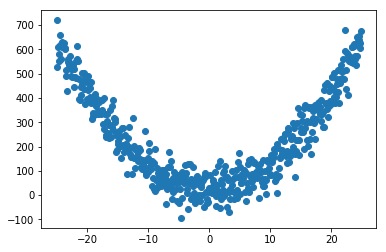

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def dataset(show=True):
    X = np.arange(-25, 25, 0.1)
    y = X**2 + 20 + np.random.randn(500)*50
    if show:
        plt.scatter(X, y)
        plt.show()
    return X, y

X, y = dataset()

# Scaling Dataset

The maximum value of y in the dataset goes upto 700 and the minimum values is less than 0. The range of y is very large which makes the convergence/loss reduction slower. So will we scale the data, scaling the data will help the model converge faster. If all the features and target are in same range, there will be symmetry in the curve of Loss vs weights/bias, which makes the convergence faster.

We will do a very simple type of scaling, we will divide all the values of the data with the maximum values for X and y respectively. 

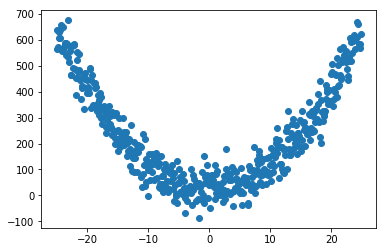

24.90000000000071 675.8121636270128 -25.0 -87.12573649123195
1.0 1.0 -1.0040160642569995 -0.12892004787785602


In [20]:
X, y = dataset()

print(max(X), max(y), min(X), min(y))

X = X/max(X)
y = y/max(y)

print(max(X), max(y), min(X), min(y))

This is not a great scaling method, but good to start. We will see many more scaling/normalizing methods later.

**Try training the model with and without scaling and see the difference yourself.**

# Linear Regression in TensorFlow

Epoch 1/500
500/500 [==============================] - 0s 767us/sample - loss: 0.4325
Epoch 2/500
500/500 [==============================] - 0s 47us/sample - loss: 0.4136
Epoch 3/500
500/500 [==============================] - 0s 44us/sample - loss: 0.3967
Epoch 4/500
500/500 [==============================] - 0s 44us/sample - loss: 0.3798
Epoch 5/500
500/500 [==============================] - 0s 45us/sample - loss: 0.3639
Epoch 6/500
500/500 [==============================] - 0s 51us/sample - loss: 0.3488
Epoch 7/500
500/500 [==============================] - 0s 47us/sample - loss: 0.3348
Epoch 8/500
500/500 [==============================] - 0s 49us/sample - loss: 0.3211
Epoch 9/500
500/500 [==============================] - 0s 58us/sample - loss: 0.3088
Epoch 10/500
500/500 [==============================] - 0s 52us/sample - loss: 0.2964
Epoch 11/500
500/500 [==============================] - 0s 52us/sample - loss: 0.2850
Epoch 12/500
500/500 [==============================] - 0s 49u

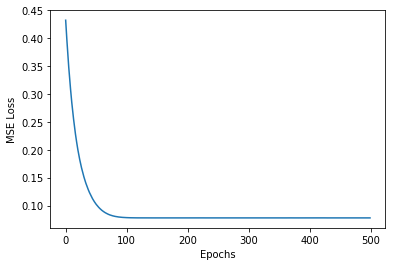

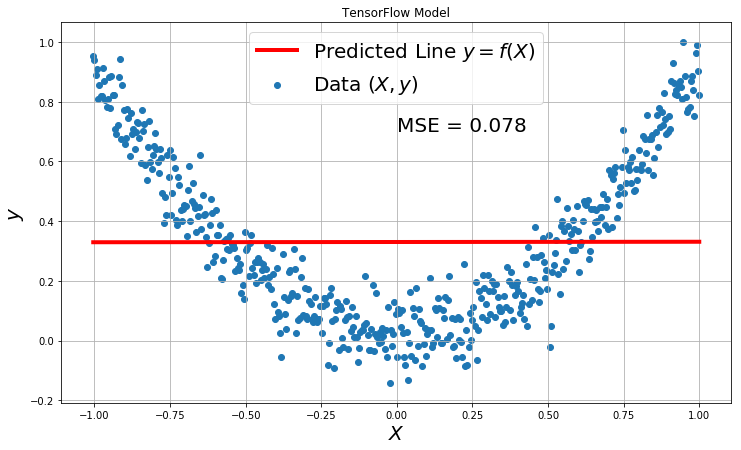

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_scaled, y_scaled, epochs=500, verbose=True)

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_scaled)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_scaled, y_scaled, label='Data $(X, y)$')
plt.plot(X_scaled, y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

Looks the model Prediction for this dataset is very bad, but that is expected as the model is a straight line, it cannot predict non linear regression data.  Is there a way to train a regression model for this task?

# Polynomial Regression

So when the dataset is not linear, linear regression cannot learn the dataset and make good predictions. 

So we need a polynomial model which consideres the polynomial terms as well. So we need terms like $x^2$, $x^3$, ..., $x^n$ for the model to learn a polynomial of $n^{th}$ degree.

$\hat{y} = w_0 + w_1x + w_2x^2 + ... + w_nx^n$

One down side of this model is that, We will have to decide the value of n. But this is better than a linear regression model. We can get an idea of the value of n by visualizing a dataset, but for multi variable dataset, we will have to try different values of n and check which is better.

## Polynomial Features

you can calculate the polynomial features for each feature by programming it or you can try ```sklearn.preprocessing.PolynomialFeatures``` which allows us to make polynomial terms of our data.

We will try degree 2, 3 and 4

In [0]:
X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
                                        
X_2 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_2.shape)
print(X_2[0])

(500, 3)
[ 1.         -1.00401606  1.00804826]


In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) 
                                        
X_3 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_3.shape)
print(X_3[0])

(500, 4)
[ 1.         -1.00401606  1.00804826 -1.01209664]


In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4) 
                                        
X_4 = poly.fit_transform(X_scaled.reshape(-1,1))
print(X_4.shape)
print(X_4[0])

(500, 5)
[ 1.         -1.00401606  1.00804826 -1.01209664  1.01616129]


The PolynomialFeatures returns $[1, x, x^2, x^3,...]$.

# Task - 2

- Train a model with polynomial terms in the dataset.
- Visualize the prediction of the model


The code remains the same except, the no of input features will be 3, 4, 5 respectively. 

# Tensorflow Model with 2nd Degree

Epoch 1/500
500/500 [==============================] - 0s 645us/sample - loss: 1.4165
Epoch 2/500
500/500 [==============================] - 0s 48us/sample - loss: 1.3336
Epoch 3/500
500/500 [==============================] - 0s 45us/sample - loss: 1.2538
Epoch 4/500
500/500 [==============================] - 0s 44us/sample - loss: 1.1771
Epoch 5/500
500/500 [==============================] - 0s 47us/sample - loss: 1.1049
Epoch 6/500
500/500 [==============================] - 0s 41us/sample - loss: 1.0371
Epoch 7/500
500/500 [==============================] - 0s 44us/sample - loss: 0.9714
Epoch 8/500
500/500 [==============================] - 0s 41us/sample - loss: 0.9107
Epoch 9/500
500/500 [==============================] - 0s 45us/sample - loss: 0.8519
Epoch 10/500
500/500 [==============================] - 0s 51us/sample - loss: 0.7980
Epoch 11/500
500/500 [==============================] - 0s 46us/sample - loss: 0.7468
Epoch 12/500
500/500 [==============================] - 0s 49u

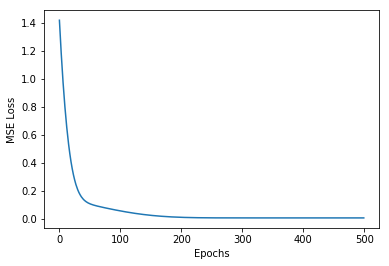

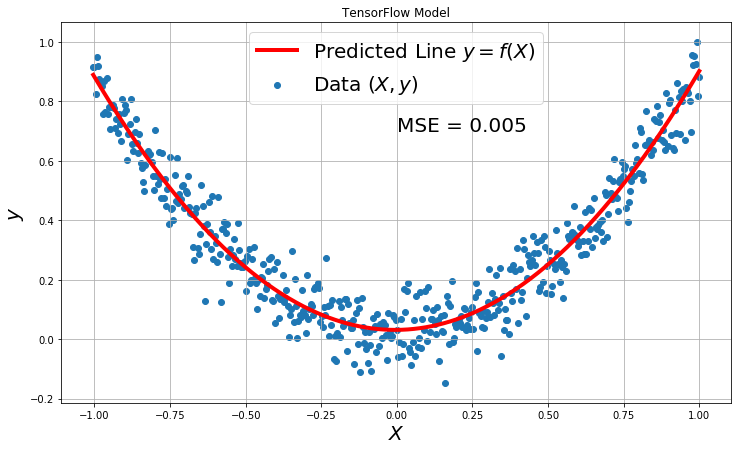

In [47]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[3])])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_2, y_scaled, epochs=500, verbose=True)

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_2)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_2[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_2[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

# Tensorflow Model with 3rd Degree

Epoch 1/500
500/500 [==============================] - 0s 565us/sample - loss: 0.7177
Epoch 2/500
500/500 [==============================] - 0s 41us/sample - loss: 0.6618
Epoch 3/500
500/500 [==============================] - 0s 38us/sample - loss: 0.6095
Epoch 4/500
500/500 [==============================] - 0s 40us/sample - loss: 0.5607
Epoch 5/500
500/500 [==============================] - 0s 42us/sample - loss: 0.5174
Epoch 6/500
500/500 [==============================] - 0s 40us/sample - loss: 0.4776
Epoch 7/500
500/500 [==============================] - 0s 42us/sample - loss: 0.4397
Epoch 8/500
500/500 [==============================] - 0s 41us/sample - loss: 0.4076
Epoch 9/500
500/500 [==============================] - 0s 43us/sample - loss: 0.3764
Epoch 10/500
500/500 [==============================] - 0s 43us/sample - loss: 0.3497
Epoch 11/500
500/500 [==============================] - 0s 41us/sample - loss: 0.3244
Epoch 12/500
500/500 [==============================] - 0s 47u

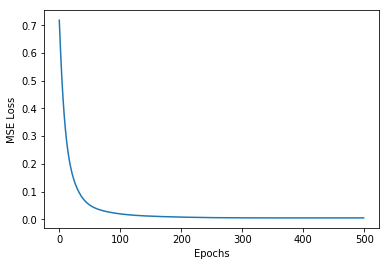

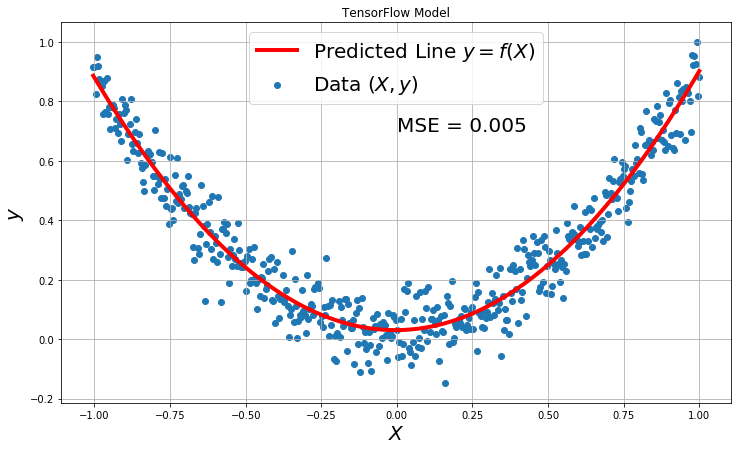

In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[4])])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_3, y_scaled, epochs=500, verbose=True)

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_3)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_3[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_3[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

# Tensorflow Model with 4th Degree

Epoch 1/500
500/500 [==============================] - 0s 575us/sample - loss: 0.6856
Epoch 2/500
500/500 [==============================] - 0s 42us/sample - loss: 0.6353
Epoch 3/500
500/500 [==============================] - 0s 43us/sample - loss: 0.5891
Epoch 4/500
500/500 [==============================] - 0s 42us/sample - loss: 0.5465
Epoch 5/500
500/500 [==============================] - 0s 42us/sample - loss: 0.5095
Epoch 6/500
500/500 [==============================] - 0s 41us/sample - loss: 0.4741
Epoch 7/500
500/500 [==============================] - 0s 36us/sample - loss: 0.4434
Epoch 8/500
500/500 [==============================] - 0s 40us/sample - loss: 0.4156
Epoch 9/500
500/500 [==============================] - 0s 45us/sample - loss: 0.3897
Epoch 10/500
500/500 [==============================] - 0s 43us/sample - loss: 0.3661
Epoch 11/500
500/500 [==============================] - 0s 41us/sample - loss: 0.3451
Epoch 12/500
500/500 [==============================] - 0s 40u

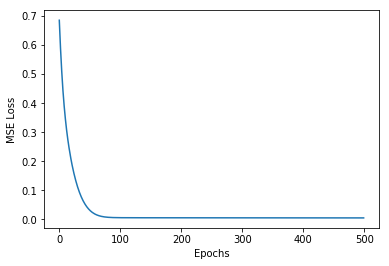

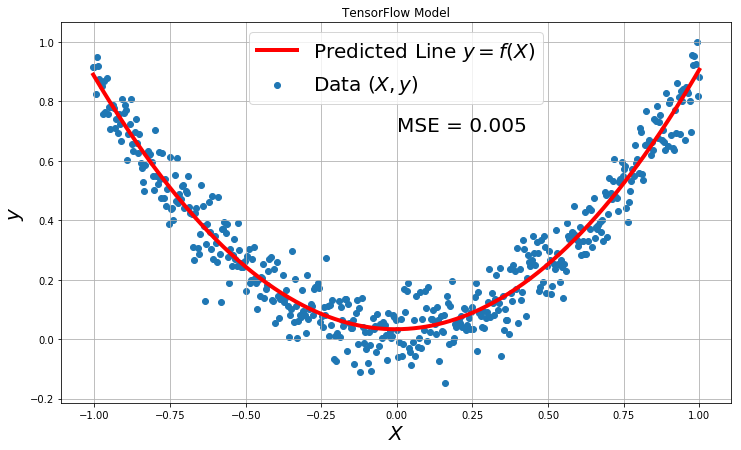

In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[5])])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_4, y_scaled, epochs=500, verbose=True)

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_4)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_4[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_4[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

The Dataset is a 2 degree dataset, so 2nd degree polynomial regression will do a good job, but 3rd, 4th,.... all also make a good prediction as thay also contain 2nd degree polynomial terms.

This is polynomial regression. Yes, its easy. But one issue, as this was a toy dataset we know its a 2nd degree data, so we tried 2,3,4. But when the data is multi dimensional we cannot visualize the dataset, so its difficult to decide the degree. This is why you will see Neural Networks are awesome. They are End-End, they do not need several feature extraction from our side, they can extract necessary features of their own.


**Make a 3rd degree or 4th degree data and try polynomial regression on it. Also try different functions like exponents, trignometric..etc.**